## Import Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist

## Load Dataset

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Data Preparation

In [4]:
## Normalization
X_train = X_train/255
X_test = X_test/255

### Build The Model

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3),
                 input_shape = (28,28,1),
                 activation = 'relu')) ##26*26*32
model.add(MaxPool2D(pool_size = (2,2))) ##13*13*32

model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3),
                 activation = 'relu')) ##11*11*32
model.add(MaxPool2D(pool_size = (2,2))) ##5*5*64

model.add(Flatten())
model.add(Dense(320, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 320)              

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

history = model.fit(X_train, y_train,  batch_size=10, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
6000/6000 [==============================] - 41s 7ms/step - loss: 0.1112 - accuracy: 0.9655 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 2/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.0440 - val_accuracy: 0.9859
Epoch 3/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 4/10
6000/6000 [==============================] - 41s 7ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 5/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0381 - val_accuracy: 0.9904
Epoch 6/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0406 - val_accuracy: 0.9900
Epoch 7/10
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0335 - val_ac

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9892


[0.060663074254989624, 0.9891999959945679]

## Use screenshot image saved in dataset to predict 

1/1 [==============================] - 0s 46ms/step
Prediction :  6


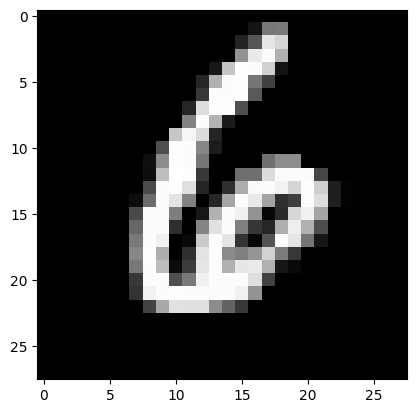

In [28]:
import cv2
img= cv2.imread('Datasets/Mnist_sample.png',0)
img_resized = cv2.resize(img,(28,28))
plt.imshow(img_resized, cmap = 'gray')
img_resized= img_resized/255
img_resized = img_resized.reshape(-1,28,28)
print("Prediction : ",np.argmax(model.predict(img_resized)))